(40, 40)


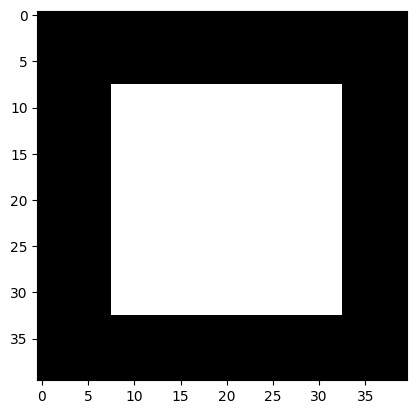

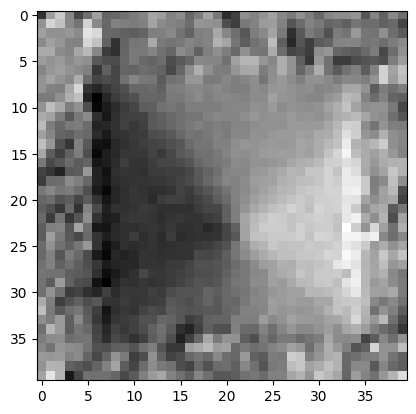

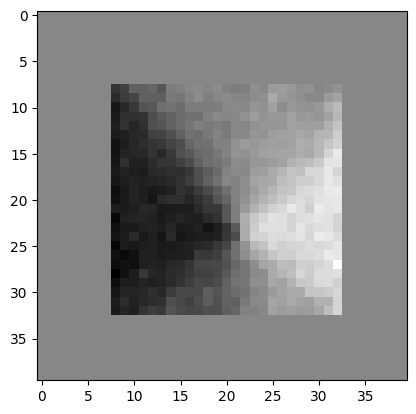

In [11]:
from squircle import Squircle, deserialize
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

figure_to_width = {
    "002": (220, 250),
    "003": (440, 500),
    "004": (320, 380),
    "005": (220, 250),
    "006": (160, 190),
    "007": (100, 130),
    "009": (440, 500),
    "010": (320, 380),
    "011": (200, 260),
    "012": (200, 260),
    "013": (220, 250),
    "014": (220, 250),
    "015": (160, 190),
    "016": (100, 130),
    "017": (100, 130),
}

def get_squircle_pixel_width(squircle_object:Squircle)->float:
    x_index = squircle_object.index%4
    if x_index == 0 or x_index==1:
        width_nm = figure_to_width[squircle_object.figure_name][0]
    else:
        width_nm = figure_to_width[squircle_object.figure_name][1]

    proportionality_constant = 1

    return round(width_nm/squircle_object.pixel_size*proportionality_constant)


def lerp(a,b,x):
    return a*(1-x) + b*(x)

def get_squircle_mask(interpolation_constant, width, size_of_picture):
    """
    Produces an ellipse. Radius changes with N as radius =  N+7 and rotation as rotation=k*10 degrees
    """
    # Count is number of figures from square to circle
    size = width
    radius = lerp(0, size, (interpolation_constant)/(5))
    x = np.arange(-int(size_of_picture/2),int(size_of_picture/2))
    y = np.arange(-int(size_of_picture/2),int(size_of_picture/2))
    xx,yy = np.meshgrid(x,y,indexing='ij')

    cross_width = size - radius
    circle_x_position = abs(size) - radius
    circle_y_position = abs(size) - radius

    pixels = np.logical_or(
        np.logical_and((xx**2) <= size**2, (yy**2) <= cross_width**2),
        np.logical_or(
            np.logical_and((yy**2) <= size**2, (xx**2) <= cross_width**2),
            (np.abs(xx)-circle_x_position)**2 + (np.abs(yy) - circle_y_position)**2 <= radius**2
        )
    )
    return pixels




SQUIRCLE_DATA_FOLDER = Path("data/magnetic-data")

squircle1 = deserialize(str(SQUIRCLE_DATA_FOLDER.joinpath("009-01")))
pixel_width = get_squircle_pixel_width(squircle1) - 0

mask = get_squircle_mask(squircle1.squircle_factor, pixel_width, 40)#squircle1.data.shape[0])



print(mask.shape)

plt.imshow(mask, cmap='gray')
plt.show()

plt.imshow(squircle1.data[:,:,1], cmap='gray')
plt.show()

plt.imshow(mask*squircle1.data[:,:,1], cmap='gray')
plt.show()
